<h1><u>An Analysis on Illegal Immigration in the U.S. from 2000-2016</u></h1>
<h3><i>By William Bermudez & Aastha Khanna</i></h3>
<h3><i>Published on May 19th, 2017</i></h3>

For our final tutorial, we decided to analyze data provided by the United States Border Patrol on arrests of illegal immigrants from 2000-2016. As there has been talk lately about building a wall across the Southwestern border of the U.S. in order to halt the flow of illegal immigration from Mexico, we wanted to look at illegal immigration (of people of both Mexican and non-Mexican nationality) over the recent years to see if we could identify any trends and analyze the effectiveness of building a wall.

This tutorial will cover the basics of data management, analysis, and machine learning, including (but not limited to) how to:
- Import data from a CSV
- Create "tidy data" using pandas dataframes
- Subset new dataframes from larger dataframes
- Visualize data using matplotlib
- Run and visualize linear regressions on data
- Create maps plotting data using the folium package

<h2> Data Curation + Management </h2>

To start, we will read data from a dataset we downloaded from Kaggle - the dataset can be found <a href="https://www.kaggle.com/cbp/illegal-immigrants">here</a>, if you would like to follow along. When we downloaded this dataset, we saved it as a CSV file named "arrests" in the same directory that this file is sitting in.

In [142]:
from numpy import * #Imports all the functions from numpy
from pandas import * #Imports all the functions from pandas
import matplotlib.pyplot as plt #Used for plotting
import warnings 
warnings.filterwarnings('ignore') #suppress warnings

data = read_csv("arrests.csv") #reading the data
data.head() #displaying the data

Border       Sector                 State/Territory  \
0  Coast    Livermore                              CA   
1  Coast        Miami                  FL, GA, SC, NC   
2  Coast  New Orleans                  LA, AL, MS, FL   
3  Coast        Ramey                              PR   
4  Coast          All  PR, LA, AL, MS, FL, GA, SC, NC   

   2000 (All Illegal Immigrants)  2000 (Mexicans Only)  \
0                           6205                  6034   
1                           6237                  2421   
2                           6478                  5985   
3                           1731                     0   
4                          20651                 14440   

   2001 (All Illegal Immigrants)  2001 (Mexicans Only)  \
0                           5211                  5007   
1                           5962                  1590   
2                           5033                  4616   
3                           1952                     0   
4                          18158                 11213   

   2002 (All Illegal Immigrants)  2002 (Mexicans Only)  \
0                           4371                  4186   
1                           5143                  1825   
2                           4665                  4126   
3                            835                     0   
4                          15014                 10137   

   2003 (All Illegal Immigrants)          ...           \
0                           3565          ...            
1                           5931          ...            
2                           5151          ...            
3                           1688          ...            
4                          16335          ...            

   2012 (All Illegal Immigrants)  2012 (Mexicans Only)  \
0                            NaN                   NaN   
1                         2509.0                 831.0   
2                          474.0                 277.0   
3                          702.0                   0.0   
4                         3685.0                1108.0   

   2013 (All Illegal Immigrants)  2013 (Mexicans Only)  \
0                            NaN                   NaN   
1                         1738.0                 388.0   
2                          500.0                 262.0   
3                          924.0                   3.0   
4                         3162.0                 653.0   

   2014 (All Illegal Immigrants)  2014 (Mexicans Only)  \
0                            NaN                   NaN   
1                         2034.0                 277.0   
2                          950.0                 465.0   
3                          958.0                   0.0   
4                         3942.0                 742.0   

   2015 (All Illegal Immigrants)  2015 (Mexicans Only)  \
0                            NaN                   NaN   
1                         1752.0                 273.0   
2                          849.0                 394.0   
3                          557.0                   1.0   
4                         3158.0                 668.0   

   2016 (All Illegal Immigrants)  2016 (Mexicans Only)  
0                            NaN                   NaN  
1                         3205.0                 652.0  
2                          764.0                 388.0  
3                          694.0                   0.0  
4                         4663.0                1040.0  

[5 rows x 37 columns]

This dataset, which was created based on the designations the U.S. Border Patrol follows, organizes these arrests based on regions called 'sectors' which group different states and territories together. The table itself organizes this data with the following types of columns:
<ul>
    <li><b>Border: </b>Specifies which border the arrest was made on.<ul>
        <li><i>North: </i>The U.S./Canadian border.</li>
        <li><i>Sourthwest: </i>The U.S./Mexican border.</li>
        <li><i>Coast: </i>Any region that touches only open water.</li> 
    </ul></li>
    <li><b>Sector: </b>The name of the sector, which is a collection of regions within the states.</li>
    <li><b>State/Territory: </b>The states/territories that are included in the sector (PR = Puerto Rico).</li>
    <li><b>20XX (All Illegal Immigrants): </b>The total # of arrests made by the U.S. Border Patrol in that sector in the year 20XX.</li>
    <li><b>20XX (Mexicans Only): </b>The # of arrests made made by the U.S. Border Patrol in that sector of people of Mexican nationality in the year 20XX.</li>
</ul>

While looking at our dataframe, we realized that the row with the sector Livermore had NaN (Not a Number) values for all years after 2005. To figure out why this occurred, we looked up the history of the Livermore sector for the U.S. Border Patrol and discovered that it was dissolved in 2006, as the sectors covering the states of California and Nevada were redrawn that year. The two maps below show what the drawn sectors looked like before and after 2006: 

Border Map Before 2006 - Livermore lies on the left side of the map (Also pay mind that this map is older than our data set, so Rio Grande Valley is McAllen)
![Border Map 1](http://wiki.radioreference.com/images/1/13/BPsectormap.jpg "Border Map Pre-2006")

Border Map After 2006 - Livermore is removed and its space is taken by San Diego, El Centro, and Yuma
![Border Map 2](https://upload.wikimedia.org/wikipedia/commons/d/d0/CBP_Sectors_Map.jpg "Border Map Post-2006")

Now that we know we have to deal with these NaN values, we must tidy our data! There are several methods to deal with tidy data such as imputing the missing data, replacing the NaN values with 0s, or just throwing the missing data rows away. (You can read more about dealing with missing data <a href="http://www.stat.columbia.edu/~gelman/arm/missing.pdf">here</a>)

We decided to deal with the NaNs for Livermore by replacing them with 0s, as we did not have a similar dataset to impute the values from, and the data for that sector is too significant to throw away. For most cases, replacing with 0 is advised against since it gives the impression that there weren't any immigrants arrested in that region, not that the region doesn't exist anymore. However, since we have only one case of missing data and we know the reason why that data is missing from external research, we'll just keep that in mind as we move forward. The 0s will help with data visualization later on, since some plotting functions don't know how to deal with NaN values.

Let's do that here:

In [143]:
data.Sector.fillna('All', inplace=True) # Sets the one NaN value in the Sector column to 'All' instead of NaN
data.fillna(0, inplace=True) # Replaces the rest of the NaN values (the ones in Livermore) to 0

data_trend = data.loc[[4,13,23]].reset_index() # Selects the rows that included the totals for each Border.

data = data.loc[data.Sector != 'All'] # Removes total rows so we can manually calculate totals for the all rows
data = melt(data, ['Border', 'Sector', 'State/Territory'], var_name = 'Year', value_name='Arrests')
# Melts down the data so that it now consists of 5 columns instead of having all those columns as years.
# The five columns are Border, Sector, State/Territory, Year, and Arrests.

i = 0
for r in data.iterrows(): #Iterates through all the rows, with 'i' being used as the row index
    s = data.iat[i, 3] #Grabs the element in the Year column
    if ('All' in s): #If the string contains the word 'All' (meaning it's for All Illegal Immigrants)
        data = data.set_value(i, 'Type', 'All Arrests') #Set the value of the a Type column to 'All Arrests'
    else: 
        data = data.set_value(i, 'Type', 'Mex Arrests') #Set the value of the Type column to 'Mex Arrests'
    i += 1
    
data['Year'] = data['Year'].str.extract('(\d{4})', expand=False).astype(int) #Takes the actual integer value out of the year
data = data.drop(['State/Territory'], 1) #Drops the state/territory column

data = pivot_table(data, values='Arrests', index=['Border', 'Sector', 'Year'], columns = ['Type'])
# Turns the three columns listed into a multiindex system for the table.

data['Non-Mex Arrests'] = data['All Arrests'] - data['Mex Arrests'] 
# Makes a new column that's the number of arrests of people not of Mexican nationality

data.head(20)

Type                   All Arrests  Mex Arrests  Non-Mex Arrests
Border Sector    Year                                           
Coast  Livermore 2000       6205.0       6034.0            171.0
                 2001       5211.0       5007.0            204.0
                 2002       4371.0       4186.0            185.0
                 2003       3565.0       3382.0            183.0
                 2004       1850.0       1753.0             97.0
                 2005        114.0        106.0              8.0
                 2006          0.0          0.0              0.0
                 2007          0.0          0.0              0.0
                 2008          0.0          0.0              0.0
                 2009          0.0          0.0              0.0
                 2010          0.0          0.0              0.0
                 2011          0.0          0.0              0.0
                 2012          0.0          0.0              0.0
                 2013          0.0          0.0              0.0
                 2014          0.0          0.0              0.0
                 2015          0.0          0.0              0.0
                 2016          0.0          0.0              0.0
       Miami     2000       6237.0       2421.0           3816.0
                 2001       5962.0       1590.0           4372.0
                 2002       5143.0       1825.0           3318.0

Our data is tidy now, and we can start to analyze the data in different ways. We want to look at the following things:
<ul>
    <li>The general trend of arrests in all regions throughout the years (Are these arrests increasing? Decreasing? In a cycle?)</li>
    <li>The percentage of arrests coming from each border over time, to see if more immigrants are coming in from certain places than others</li>
    <li>The proportion of Mexican vs. non-Mexican arrests over the years, and whether or not that percentrage has increased or decreased.</li>
</ul>
    
To start, we're going to create four new dataframes with observations subsetted from the original dataframe, data. We will create one dataframe for each border type (Coast, Southwest, North). Afterwards, we will create one more dataframe for Coast, Southwest, and North that displays the sum of all arrests for each year in that region, separated by nationality (Mexican vs. Non-Mexican). The code below accomplishes this:

In [144]:
idx = IndexSlice #Used to extract slices of data with a multiindex system.

coast = data.loc['Coast', :] #Grabs the data under the Coast sector
coast_sumsec = coast.groupby(level='Year').sum() #Sums up the values by year

south = data.loc['Southwest', :] #Grabs the data under the Southwest sector
south_sumsec = south.groupby(level='Year').sum() #Sums up the values by year

north = data.loc['North', :] #Grabs the data under the North sector
north_sumsec = north.groupby(level='Year').sum() #Sums up the values by year

all_sumsec = data.groupby(level=['Year']).sum() #Sums up the values by year

south.head(10)

Type           All Arrests  Mex Arrests  Non-Mex Arrests
Sector   Year                                           
Big Bend 2000      13689.0      12851.0            838.0
         2001      12087.0      11107.0            980.0
         2002      11392.0      10321.0           1071.0
         2003      10319.0       9477.0            842.0
         2004      10530.0       9736.0            794.0
         2005      10536.0       9568.0            968.0
         2006       7520.0       6791.0            729.0
         2007       5536.0       5002.0            534.0
         2008       5391.0       4756.0            635.0
         2009       6360.0       5573.0            787.0

In [145]:
south_sumsec.head(10)

Type  All Arrests  Mex Arrests  Non-Mex Arrests
Year                                           
2000    1643679.0    1615081.0          28598.0
2001    1235718.0    1205390.0          30328.0
2002     929809.0     901761.0          28048.0
2003     905065.0     865850.0          39215.0
2004    1139282.0    1073468.0          65814.0
2005    1171396.0    1016409.0         154987.0
2006    1071972.0     973819.0          98153.0
2007     858638.0     800634.0          58004.0
2008     705005.0     653035.0          51970.0
2009     540865.0     495582.0          45283.0

<h2> Data Analysis + Visualization </h2>

<h3> Using matplotlib: </h3>

Now that we have this data, let's visualize it! Our goal is to create four line graphs, one for each region and another for the sums of all the regions. This will allow us to visualize the trends in illegal immigration over the years for each individual border, and the overall trend for the entire U.S. as well. Additionally, we would like to create a stacked bar plot that will allow us to easily visualize the breakdown of arrests by border. 

We will be using matplotlib in order to plot these visualizations, so be sure to download it if you plan on following along! Installation instructions can be found <a href="https://matplotlib.org/faq/installing_faq.html"> here</a>, and a beginner's tutorial <a href="https://matplotlib.org/users/pyplot_tutorial.html"> here</a>.

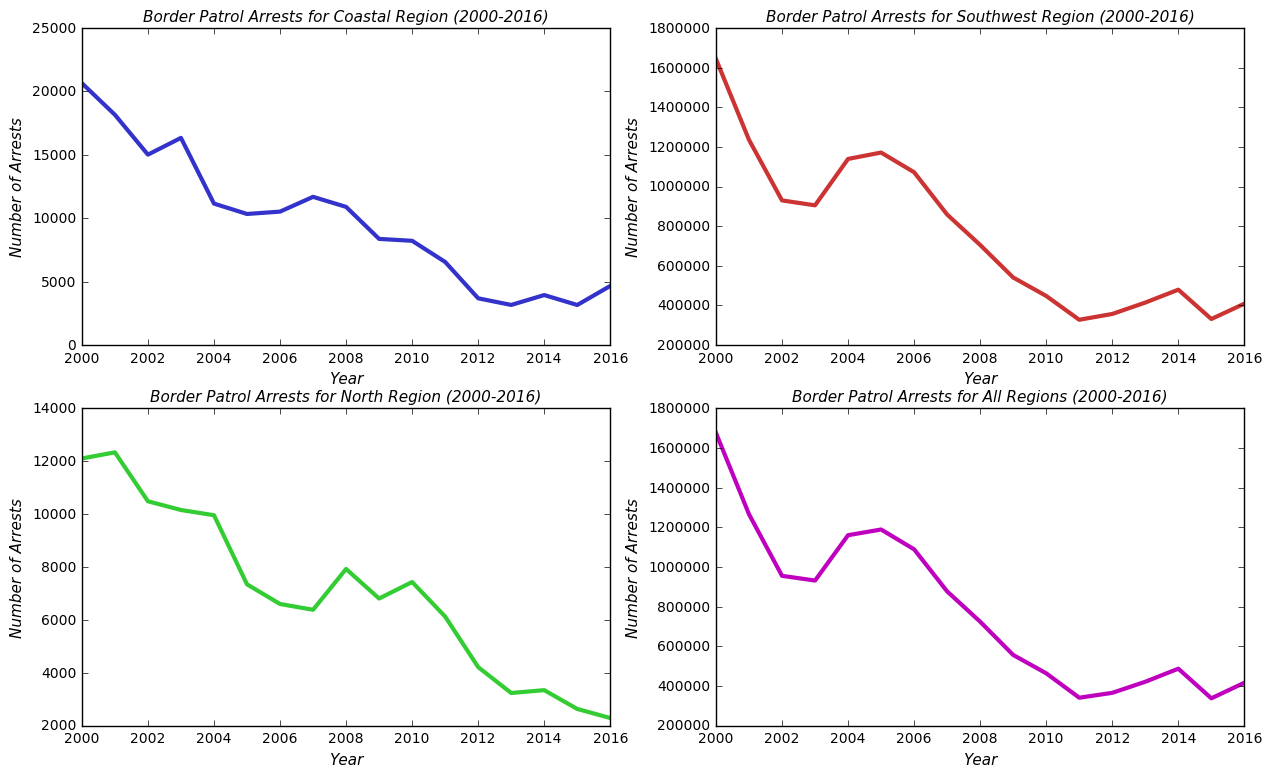

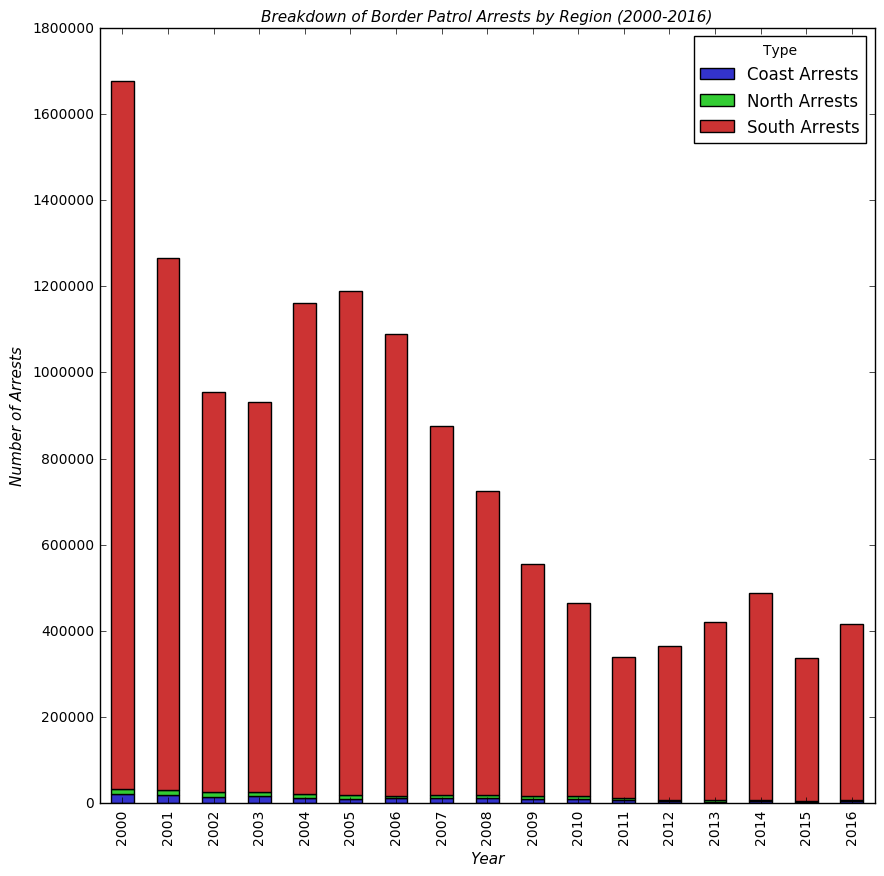

In [146]:
plt.gcf().set_size_inches(15,9) #Sets the size of the future plot in inches
coast_color = '#3333cc'
north_color = '#33cc33'
south_color = '#cc3333'
# Grabs custom colors for each sector

plt.subplot(2, 2, 1) #First subplot in a 2x2 grid of plots
coast_sumsec['All Arrests'].plot(linewidth=3, color=coast_color, legend=None) #Plots the sumsec table
plt.title('Border Patrol Arrests for Coastal Region (2000-2016)',
                  fontsize=11, style='oblique') #Adds title
plt.xlabel('Year', fontsize=11, style='oblique') #Adds xlabel
plt.ylabel('Number of Arrests', fontsize=11, style='oblique') #Adds ylabel

plt.subplot(2, 2, 2)
south_sumsec['All Arrests'].plot(linewidth=3, color=south_color, legend=None)
plt.title('Border Patrol Arrests for Southwest Region (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.subplot(2, 2, 3)
north_sumsec['All Arrests'].plot(linewidth=3, color=north_color, legend=None)
plt.title('Border Patrol Arrests for North Region (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.subplot(2, 2, 4)
all_sumsec['All Arrests'].plot(linewidth=3, color='m', legend=None)
plt.title('Border Patrol Arrests for All Regions (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')


stack_sec = coast_sumsec[['All Arrests']] 
#Grabs only the 'All Arrests' column of coast_sumsec to be used for a stacked bar plot
stack_sec['North Arrests'] = north_sumsec['All Arrests'] #Adds the North data
stack_sec['South Arrests'] = south_sumsec['All Arrests'] #Adds the Southwest data
stack_sec.rename(columns={'All Arrests' : 'Coast Arrests'}, inplace=True) #Changes the name of the first column

stack_sec.plot(kind='bar', stacked=True, color=[coast_color, north_color, south_color]) #Plots the stacked bar plot

plt.gcf().set_size_inches(10,10) #Set bar plot size
plt.title('Breakdown of Border Patrol Arrests by Region (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.show() #Shows all the plots

Wow! These visualizations provide us with a lot of new information. A few things that jumped out at us:

- The overall trend over all borders is that illegal immigration arrests went down drastically over time (though there are spikes in certain years for certain borders)
- The vast majority of the arrests are coming from the Southwest border

Now that we are aware of this, our next visualizations will be aimed at breaking down the proportion of arrests of people of Mexican vs. non-Mexican nationality based on year. To do this, we will create another stacked bar plot with the numbers of arrests as the y-axis, along with a line graph with the percentage of arrests of people of Mexican nationality on the y-axis.

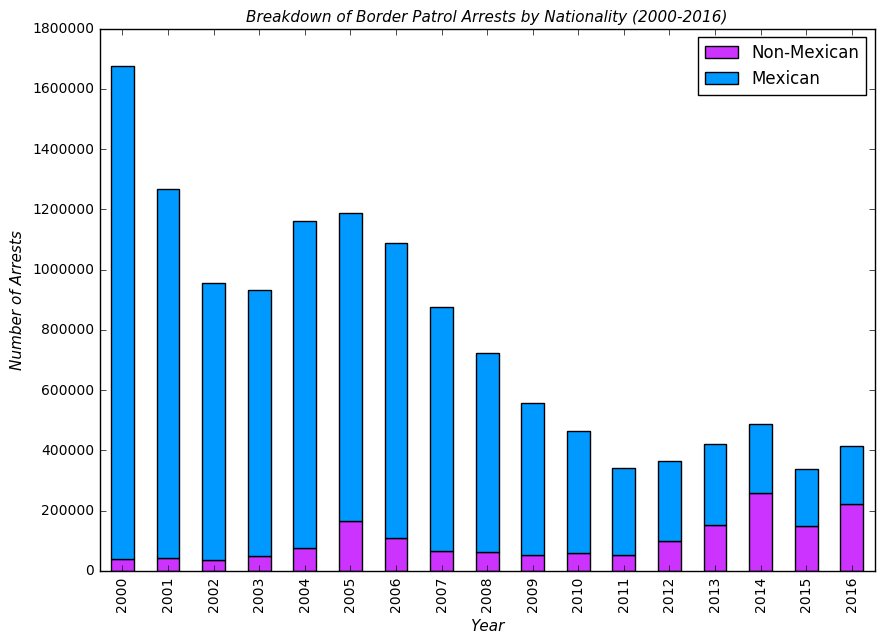

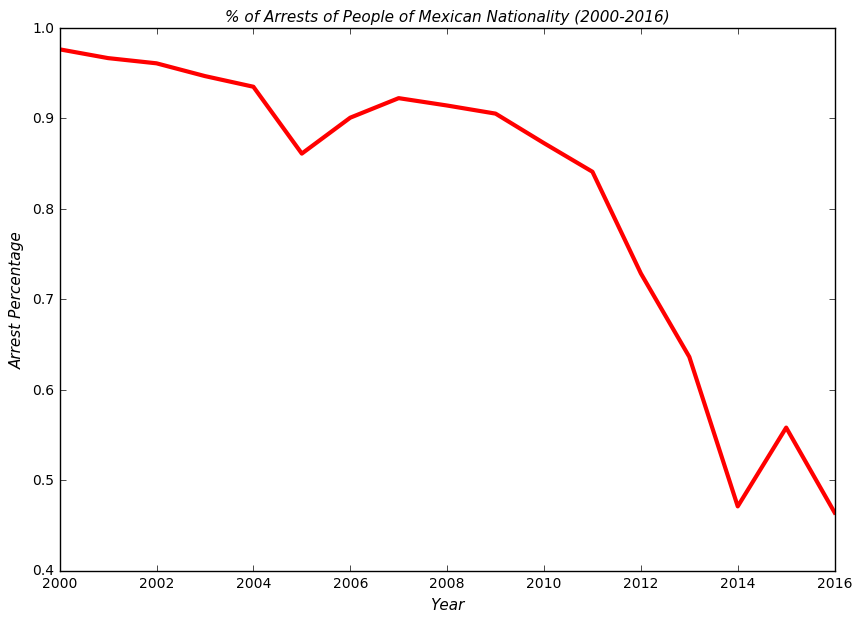

In [147]:
all_sumsec['Percentage Mex'] = all_sumsec['Mex Arrests'] / all_sumsec['All Arrests'] #Makes a percentage column

all_sumsec[['Non-Mex Arrests', 'Mex Arrests']].plot(kind='bar', stacked=True, color=['#cc33ff','#0099ff']) #Makes new bar plot
plt.gcf().set_size_inches(10,7)

plt.title('Breakdown of Border Patrol Arrests by Nationality (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.legend(['Non-Mexican','Mexican'])

plt.figure() #Makes a new figure for plotting
all_sumsec['Percentage Mex'].plot(kind='line', linewidth=3, color='r') #Plots the percentage as a line plot
plt.gcf().set_size_inches(10,7)
plt.title('% of Arrests of People of Mexican Nationality (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Arrest Percentage', fontsize=11, style='oblique')

plt.show()

We can tell from these plots that the percentage of arrests of people of Mexican nationality have gone down drastically over the last decade and a half, hitting an ultimate low at 2016, the last year that the Border Patrol provided data for. 

With the knowledge that most border patrol arrests come from the Southwest border, let's take a look at the sectors that make up the Southwest border. Let's start by making stacked bar plots of border patrol arrests for the Southwest border by region - one for all arrests and one for arrests of people of Mexican nationality.

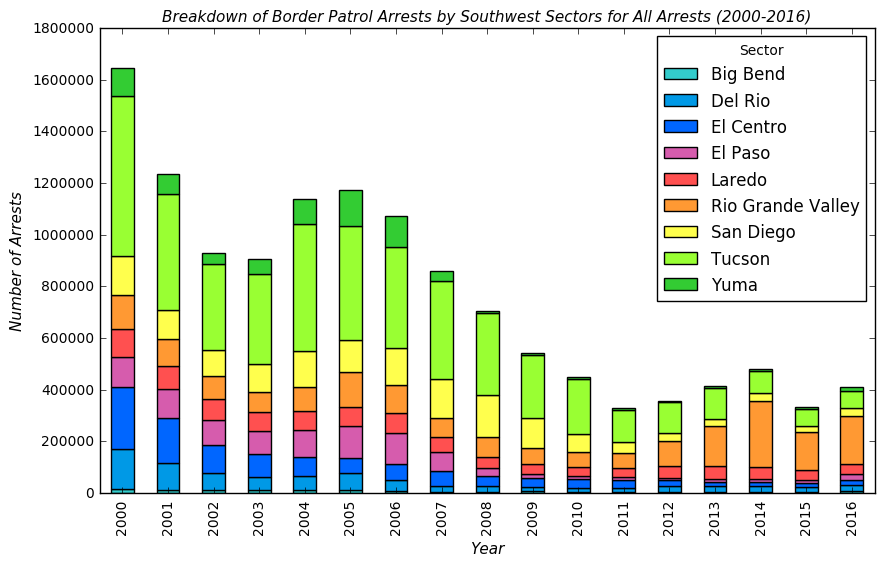

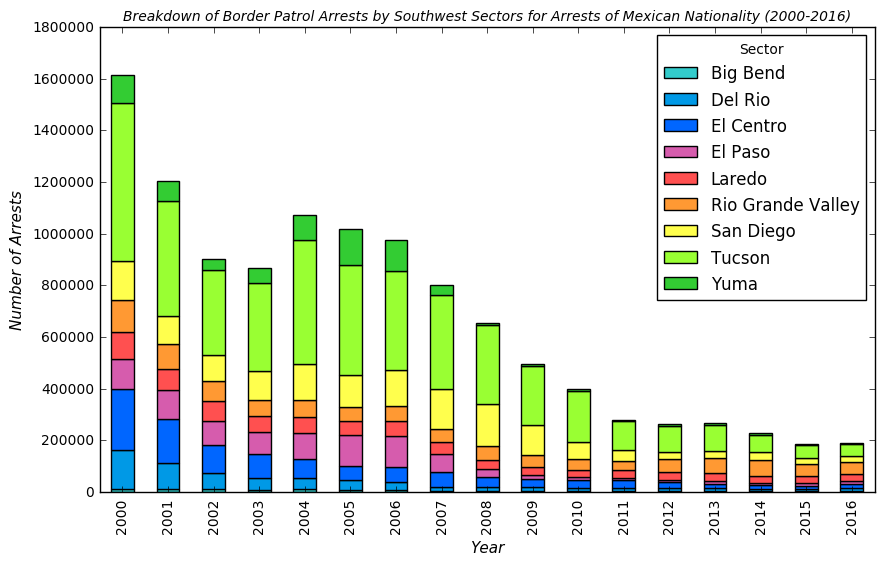

In [148]:
south_all = south[['All Arrests']] #Grabs the total arrests for the southwest
south_mex = south[['Mex Arrests']] #Grabs the mex arrests for the southwest

south_all = south_all.unstack(level=0)['All Arrests'] #Removes the sector level in indexing
south_mex = south_mex.unstack(level=0)['Mex Arrests']

colors = ['#33cccc','#0099e6', '#0066ff', '#d65cad', '#ff5050', '#ff9933', '#ffff4d', '#99ff33', '#33cc33']
# List of colors used for plot later
south_all.plot(kind='bar', stacked=True, color=colors) #Makes stacked bar plot of all arrests
plt.gcf().set_size_inches(10,6)
plt.title('Breakdown of Border Patrol Arrests by Southwest Sectors for All Arrests (2000-2016)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

south_mex.plot(kind='bar', stacked=True, color=colors) #Makes stacked bar plot of mex arrests
plt.gcf().set_size_inches(10,6)
plt.title('Breakdown of Border Patrol Arrests by Southwest Sectors for Arrests of Mexican Nationality (2000-2016)',
                  fontsize=10, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.show()

From these plots we can see that for many sectors, the number of total arrests went down over time, whereas for a couple (noteably Rio Grande Valley) the total number of arrests went up. However, it seems like arrests of people of Mexican nationality went down in all sectors from 2000 to 2016. Let's take a closer look at this by creating a line graph.

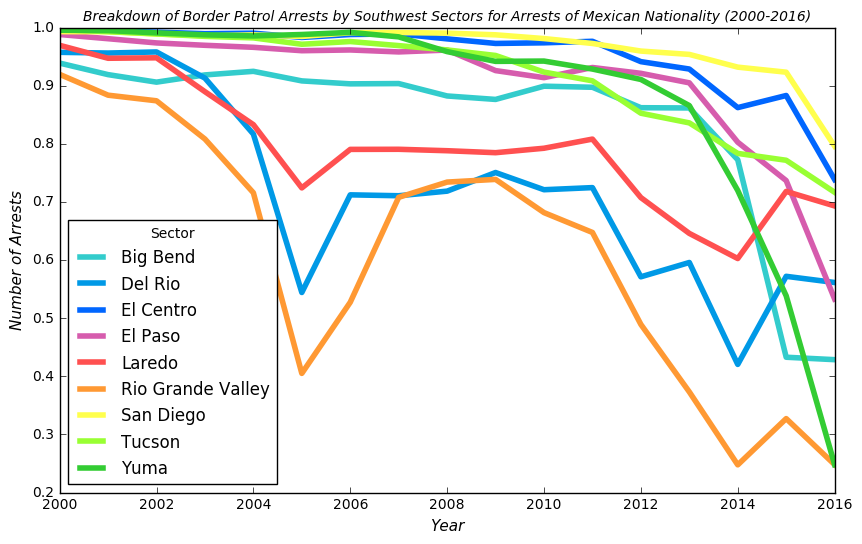

In [149]:
perc = south_mex / south_all #calculating percentage for all sectors

perc.plot(linewidth=4, color=colors)
plt.gcf().set_size_inches(10,6)
plt.title('Breakdown of Border Patrol Arrests by Southwest Sectors for Arrests of Mexican Nationality (2000-2016)',
                  fontsize=10, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')
plt.show()

As you can see, we were correct! In 2000, all sectors started out with people of Mexican nationality making up 90-100% of arrests. However, in 2005, something occured on the right side of Mexico's border (Rio Grande Valley, Del Rio, Laredo) that resulted in less people of Mexican nationality being arrested in comparison to others - perhaps this had something to do with the redrawing of the sectors. By 2016, all percentages were down drastically.

What happened in 2005 to make the percentage go down? Unfortunately, we were not able to find a definitive answer. However, through research we were able to discover that the Secure Fence Act was signed by President George W. Bush in 2006, and was built along the Southwest border from California through Texas between then and 2011 (read more <a href="https://en.wikipedia.org/wiki/Secure_Fence_Act_of_2006">here</a>). After 2011, there were drastic drops in arrests and arrests of people of Mexican nationality for all regions. Of course, without more evidence we cannot definitively claim that the fence was the reason that these arrests went down; however, there certainly seems to be a correlation. 

<h3> Using Folium: </h3>

We thought it'd be interesting to create a map that would allow us to see the average percentage of arrests of people of Mexican nationality on an actual map of the United States. To do this, we will be using a package called Folium - installation instructions can be found <a href="https://pypi.python.org/pypi/folium">here</a>, and a beginner's tutorial <a href="https://folium.readthedocs.io/en/latest/">here</a>.

To start, we are going to create <a href="https://en.wikipedia.org/wiki/GeoJSON">geoJSONs</a> of our sector maps. Since we will actually have two maps, as some of the sectors were redrawn in 2006, we will be creating one for 2000-2005 (saved as "Pre2006.geojson") and one from 2012-2016 (saved as "Post2006.geojson"). We can draw rough approximates of the maps (found in the Data Curation + Management section above) by hand using <a href="http://geojson.io/#map=2/20.0/0.0">this</a> online geoJSON generator - since we were not able to find the exact coordinates of the sector borders, this is the best we can do. The online generator will fill in the geoJSON as you draw the borders of your map, so don't be worried if you've haven't used JSON before! Once we create the map, we will load it in our code use Folium to complete the rest.

In [150]:
import folium
pre_map = folium.Map(location=[37.09, -95.71], zoom_start=4) #Makes map for the sector map before 2006
post_map = folium.Map(location=[37.09, -95.71], zoom_start=4) #Makes map for the sector map after 2012

before_layer = r'./Pre2006.geojson' #loading pre-2006 map
after_layer = r'./Post2006.geojson' #loading post-2006 map


pre_data = data.loc[idx[:,:,:2005], idx[:]] #Picks only entries before the year 2006
pre_data.index = pre_data.index.droplevel([0,2]) #Drops border level
pre_data['Perc'] = pre_data['Mex Arrests'] / pre_data['All Arrests'] #calculating percentages
pre_data = pre_data.groupby(pre_data.index).mean() #calculating mean for 2000-2005
pre_data['Sector'] = pre_data.index #removing sector as index and adding it as a column instead
pre_map.choropleth(geo_path=before_layer, data=pre_data, #coloring in the map with the averages
             columns=['Sector', 'Perc'],
             key_on='feature.properties.sector',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='% of Mexican Arrests from 2000-2006')

post_data = data.loc[idx[:,:,2012:], idx[:]] #Picks only entries after the year 2012
post_data.index = post_data.index.droplevel([0,2]) #Drops border level
post_data['Perc'] = post_data['Mex Arrests'] / post_data['All Arrests']
post_data = post_data.groupby(post_data.index).mean() #calculating mean for 2012-2016
post_data['Sector'] = post_data.index
post_map.choropleth(geo_path=after_layer, data=post_data, #coloring in map
             columns=['Sector', 'Perc'],
             key_on='feature.properties.sector',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='% of Mexican Arrests from 2012-2016')

![Pre 2006 map](http://aasthakhanna.github.io/pre2006.JPG)

![Post 2006 map](http://aasthakhanna.github.io/post2006.JPG)

Unfortunately, converting our iPython notebook and hosting the code on Github make the maps disappear, so instead we have provided screenshots to show you what they should look like. However, when the map works correctly, it provides us with a fun, interactive representation of our data that conveys a lot of information in an easy to digest way.

<h2> Hypothesis Testing</h2>

Based on our knowledge that the Secure Fence Act was signed in late 2006 and just about finished in 2011, let's hypothesis test to see if the numbers of arrests of people of Mexican nationality were lower in 2012 (after the fence was finished) than in 2006 (before the fence was started, for the most part - the act was signed in October). We chose to use 2006 instead of 2005 as our pre-fence date instead of 2005, as 2005 was before the sectors were rezoned, which could lead to misleading results in our hypothesis testing. Again, as we conduct this test keep in mind that there may have been many factors that led to the change in number of arrests, not just the construction of the wall.

<i>Null Hypothesis:</i> The number of arrests of people of Mexican nationality in the Southwest in 2006 is equal to the number in 2012.

<i>Alternative Hypothesis:</i> The number of arrests of people of Mexican nationality in the Southwest in 2006 is greater than the number in 2012.

We will use a paired t-test to test our hypothesis, and use .05 as our rejection value - this means that if our calculated p-value is less than .05, we can reject the null hypothesis.

In [151]:
from scipy import stats

data_south_06 = south.loc[idx[:,2006], idx[:]] #get all 2006 data from the southwest dataset
before = np.array(data_south_06['Mex Arrests']) #put all arrests of mexican nationality in an array

data_south_12 = south.loc[idx[:,2012], idx[:]] #same thing, but for 2012 - double-check data is in same order as above!
after = np.array(data_south_12['Mex Arrests'])

_, p = stats.ttest_rel(before, after) #conduct the paired t-test
p = p/2 #divide by 2 as we are conducting a one-tailed test
p

0.013722937038613343

Based on our hypothesis testing, we can reject the null hypothesis - our data suggests that the number of arrests of people of Mexican nationality in the Southwest in 2006, before the Secure Fence Act was enacted, is greater than the number in 2011, after the wall was finished.

<h2> Machine Learning</h2>

Let's use a regression in order to find a mathematical model that best fits the data, and extend that model out to see how the trend might continue in the future years. Note that this of course is just a prediction, and the model may change in the future years for many reasons we cannot account for. However, based on the trend observed between 2000 and 2016, these will be the predictions we can make.

To create this regression, we will be using scipy to fit a curve to a specified model. Before we start this process, we must decide what kind of model we would like to use. For this, we used an online graphing tool (found <a href="https://www.desmos.com/calculator"> here</a>) to decide that a model based off of y = p1/(p2 * (x^.2)) + b would be the good fit for our data, where p1, p2, and b are numbers that our curve_fit will find for us. The results are as follow:

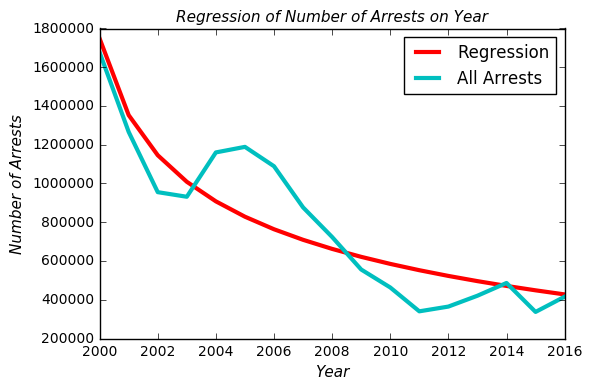

In [152]:
from scipy.optimize import curve_fit

xdata = np.array(all_sumsec.index) #getting years
ydata = np.array(all_sumsec['All Arrests']) #getting all arrests column

def f(x, p1, p2, b):
  return (p1/(p2*((x-1999)**.2))) + b #our model function as defined above

popt, pcov = curve_fit(f, xdata, ydata,p0=None) #using curve_fit to calculate coefficients and covariance

p1 = popt[0] #assigning p1 val in model
p2 = popt[1] #assigning p2 val
b = popt[2] #assigning b val
residuals = ydata - f(xdata,p1,p2,b) #calculating residuals btw model and actual data
fres = sum(residuals**2) #sums of squares using residuals

all_sumsec['Regression'] = (p1/(p2*((all_sumsec.index-1999)**.2))) + b #new regression column with regression prediction per year

all_sumsec['Regression'].plot(kind='line', linewidth=3, color='r', legend=True) #plotting regression column
all_sumsec['All Arrests'].plot(kind='line', linewidth=3, color='c', legend=True) #plotting actual # of arrests

plt.title('Regression of Number of Arrests on Year', #title
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique') #labelling x-axis
plt.ylabel('Number of Arrests', fontsize=11, style='oblique') #labelling y-axis

plt.show()

We then extended the model out a few years to make our predictions on how the trend would continue in the following years.

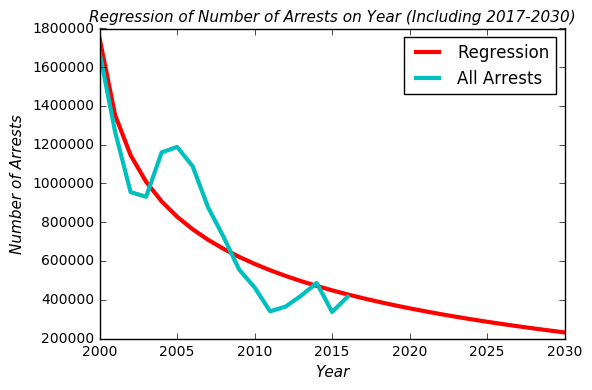

In [153]:
pred_table = all_sumsec[['All Arrests']] #copying over all arrests numbers to a new dataset
for i in range(2017,2031):
    pred_table.loc[i] = np.NaN #adding new rows for 2017-2030

pred_table['Regression'] = (p1/(p2*((pred_table.index-1999)**.2))) + b #creating regression column with newly found equation

pred_table['Regression'].plot(kind='line', linewidth=3, color='r', legend=True) #plotting regression for all years 2000-2030
pred_table['All Arrests'].plot(kind='line', linewidth=3, color='c', legend=True) #plotting all arrests 2000-2016

plt.title('Regression of Number of Arrests on Year (Including 2017-2030)',
                  fontsize=11, style='oblique') #title
plt.xlabel('Year', fontsize=11, style='oblique') #labelling x-axis
plt.ylabel('Number of Arrests', fontsize=11, style='oblique') #labelling y-axis

plt.show()

As you can see, the number of arrests keep on declining through the years, seeming like they might plateau around 200,000 arrests in 2030 and beyond. 

Let's see if we can do a regression on the arrests of people of Mexican nationality over the years, and then also extend it out to see the predictions from 2017-2030.

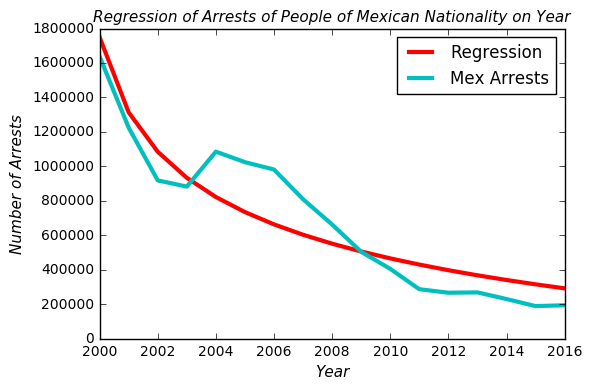

In [154]:
from scipy.optimize import curve_fit

xdata = np.array(all_sumsec.index)
ydata = np.array(all_sumsec['Mex Arrests'])

def f(x, p1, p2, b):
  return (p1/(p2*((x-1999)**.2))) + b

popt, pcov = curve_fit(f, xdata, ydata,p0=None)

p1 = popt[0]
p2 = popt[1]
b = popt[2]
residuals = ydata - f(xdata,p1,p2,b)
fres = sum(residuals**2)

all_sumsec['Regression'] = (p1/(p2*((all_sumsec.index-1999)**.2))) + b

all_sumsec['Regression'].plot(kind='line', linewidth=3, color='r', legend=True)
all_sumsec['Mex Arrests'].plot(kind='line', linewidth=3, color='c', legend=True)

plt.title('Regression of Arrests of People of Mexican Nationality on Year',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.show()

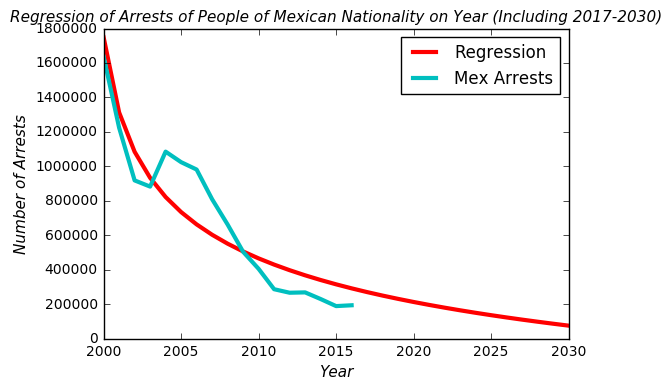

In [155]:
pred_table = all_sumsec[['Mex Arrests']]
for i in range(2017,2031):
    pred_table.loc[i] = np.NaN

pred_table['Regression'] = (p1/(p2*((pred_table.index-1999)**.2))) + b

pred_table['Regression'].plot(kind='line', linewidth=3, color='r', legend=True)
pred_table['Mex Arrests'].plot(kind='line', linewidth=3, color='c', legend=True)

plt.title('Regression of Arrests of People of Mexican Nationality on Year (Including 2017-2030)',
                  fontsize=11, style='oblique')
plt.xlabel('Year', fontsize=11, style='oblique')
plt.ylabel('Number of Arrests', fontsize=11, style='oblique')

plt.show()

We reach the same conclusion as we did with our regression over total arrests - the amount of arrests of people of Mexican nationality seem like it will decrease and even plateau over the upcoming years, if this model is accurate.

<h2> Conclusions </h2>

Here is some objective information to start off with:
- The amount of arrests made by the U.S. Border Patrol of people attempting to immigrate illegally has decreased greatly from 2000 to 2016
- The amount of arrests of people of Mexican nationality who attempted to immigrate illegally has decreased greatly from 2000 to 2016
- The percentage of arrests of people of Mexican nationality decreased from 97.64% in 2000 to 46.41% in 2016
- The vast majority of arrests have consistantly been from the Southwest border
- The percentage of arrests of people of Mexican nationality decreased from 2006, the year that the Secure Fence Act was signed, to 2012, the first year after the Act was fully implemented across the U.S./Mexico border from Texas to California

Depending on which side you support, there are reasons to and reasons to not build a wall, each with its own caveats.

Reasons to build:
- After the Secure Fence Act was enacted, illegal immigration of people of Mexican nationality dropped significantly across the Southwest border, showing that implementing a physical barrier correlates with a decrease in Mexican immigration.
    - Again, remember that correlation does not equal causation!

Reasons to not:
- The percentage of arrests of people of Mexican nationality, the number of arrests of people of Mexican nationality, and the number of total arrests of people of all nationalities trying to immigrate illegally have significantly decreased from 2000-2016. If this trend continues, as showcased in our Machine Learning section, the numbers will continue to decrease - is there really a need for a wall then?
    - However, just because our model predicted this does <i>not</i> mean it will happen! Many factors may influence the actual numbers, and change the trend in the future.
    
Thank you for making it all the way through this tutorial! We hope that you learned something new from this, and start your own data adventure sometime soon.